# Code for PV Cell Experiment

Import standard packages and set paths

In [1]:
import pandas as pn
import numpy as np

import sys, os
os.chdir(os.path.join(os.path.expanduser("~"),'active-manifolds/code_anthony/src'))
sys.path.insert(0,os.path.join(os.path.expanduser("~"),'active-manifolds/active_subspaces-master/active_subspaces/utils/'))

Import my functions

In [3]:
from functions.error_mains import *
from functions.main_base import *
from functions.plotfuncs import *

Create and process data identically to Constantine

In [4]:
#Make matrices of data: X is inputs, f outputs, G 1st-order FD gradients
df = pn.DataFrame.from_csv('/Users/7ag/active-manifolds/code_anthony/as-data-sets/SingleDiodePV/SingleDiodePV-Pmax.txt')
data = df.as_matrix()
data
X = data[:,:5]
f = data[:,5]
G = data[:,6:]
M,m = X.shape
labels = df.keys()
in_labels = labels[:5]
out_label = labels[5]

#Normalize with Constantine function
xl = np.array([0.05989, -24.539978662570231, 1.0, 0.16625, 93.75])
xu = np.array([0.23598, -15.3296382905940, 2.0, 0.665, 375.0])
Y = X.copy()
Y[:,1] = np.log(Y[:,1])
XX = BoundedNormalizer(xl, xu).normalize(Y)
GG = preprocessing.normalize(G)

Run the AM algorithm and generate plots

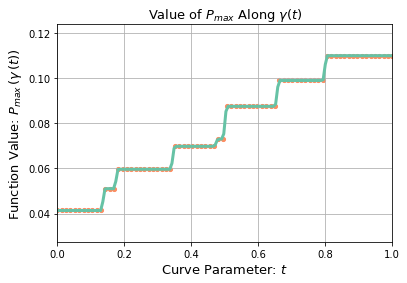

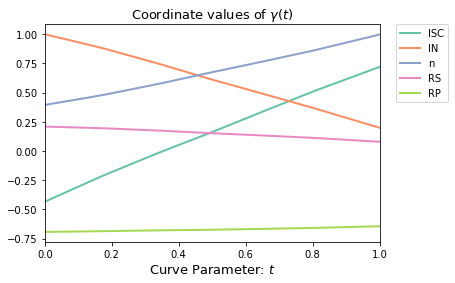

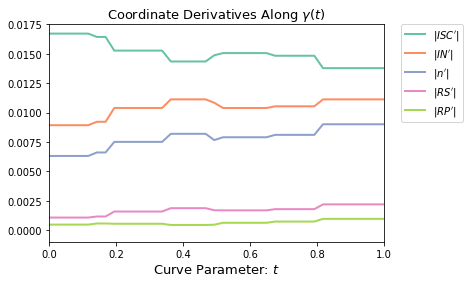

In [5]:
#Build the AM
np.random.seed(42)
am, fVals = build_AM_from_data(np.ravel(2*np.random.rand(5, 1) - 1),XX,f,GG,0.02)

#Fit the data with cubic splines
PVsplinefit(am,fVals)


#Quantities needed for plots
numpts = len(am)
sValues = np.linspace(0., numpts, numpts) / (numpts)

#Coordinate Plot
fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title(r'Coordinate values of $\gamma(t)$', fontsize = 13)
ax.set_xlabel(r'Curve Parameter: $t$', fontsize = 13)
plt.plot(sValues, am[:,0], c='#66c2a5', label = 'ISC', markersize = 2, linewidth=2)
plt.plot(sValues, am[:,1], c='#fc8d62', label = 'IN', markersize = 2,linewidth=2)
plt.plot(sValues, am[:,2], c='#8da0cb',  label = 'n', markersize = 2,linewidth=2)
plt.plot(sValues, am[:,3], c='#e78ac3', label = 'RS', markersize = 2,linewidth=2)
plt.plot(sValues, am[:,4], c='#a6d854', label = 'RP', markersize = 2,linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,1)
plt.savefig('PVcoords.pdf',bbox_inches = 'tight')

#Derivative Plot
fig=plt.figure()
ax = fig.add_subplot(111)
ax.set_title(r'Coordinate Derivatives Along $\gamma(t)$', fontsize = 13)
ax.set_xlabel(r'Curve Parameter: $t$', fontsize = 13)
plt.plot(sValues,np.abs(np.gradient(am[:,0])), c='#66c2a5', label = r'$|ISC^\prime|$', markersize = 3, linewidth=2)
plt.plot(sValues,np.abs(np.gradient(am[:,1])), c='#fc8d62', label = r'$|IN^\prime|$', markersize = 3, linewidth=2)
plt.plot(sValues,np.abs(np.gradient(am[:,2])), c='#8da0cb',  label = r'$|n^\prime|$', markersize = 3, linewidth=2)
plt.plot(sValues,np.abs(np.gradient(am[:,3])), c='#e78ac3', label = r'$|RS^\prime|$', markersize = 3, linewidth=2)
plt.plot(sValues,np.abs(np.gradient(am[:,4])), c='#a6d854', label = r'$|RP^\prime|$', markersize = 3, linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0,1)
plt.ylim(-0.001,0.0175)
plt.savefig('PVderivs.pdf', bbox_inches='tight')

Run the AS algorithm and generate plot

The R^2 value of the response surface is 0.9800


(0.02, 0.16)

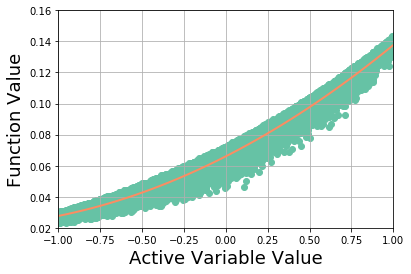

In [5]:
#Compute the AS
ss = subspaces.Subspaces()
ss.compute(df=G, nboot=500)
ss.partition(1)
y = np.dot(XX,ss.W1)

#Approximate it with a poly of deg 2
RS = subspaces.PolynomialApproximation(2)
f = f.reshape((len(f),1))
RS.train(y, f)
print 'The R^2 value of the response surface is {:.4f}'.format(RS.Rsqr)
ytest = np.array(make_mesh(0.05,1))

#Plot the data and response surface prediction
plt.figure()
plt.scatter(y, f, c='#66c2a5')
plt.plot(ytest, RS.predict(ytest)[0], c='#fc8d62',linewidth=2)
plt.grid(True)
plt.xlabel('Active Variable Value', fontsize=18)
plt.ylabel('Function Value', fontsize=18)
plt.xlim(-1,1)
plt.ylim(0.02,0.16)
#plt.savefig('PVasplot.pdf',bbox_inches='tight')

Scripts to test errors in AS and AM

level set for data point  [-0.23034332  0.08418773  0.19317105  0.30728441  0.54153606],  2000 of 2000
The L1 Error is 0.006051
The L2 Error is 0.000189
The R^2 value of the response surface is 0.9799
The L1 Error is 0.035726
The L2 Error is 0.045327


(0.035726233996681983, 0.045327367919197038)

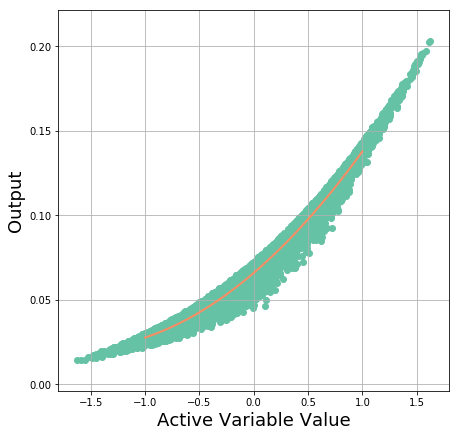

In [4]:
#Error comparison AM vs AS
mainRandEx(42,5,XX,f,GG,0.005,8000,'PV-AM')
SubspEx(42,XX,f,G,8000,'PV-AS')